# Second order high pass filter theory

## Use of Sympy to get Inverse Laplace transform, roots, etc.

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
tau, z, t, w, K = sympy.symbols('tau, z, t, w, K', real=True, positive=True)
s = sympy.Symbol('s')

In [3]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

### This is the standard form for the second order system transfer function


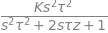

In [4]:
G = K*tau**2*s**2/(tau**2*s**2 + 2*tau*z*s + 1)
G

In [5]:
# In recent versions of Sympy, we can solve for the step response directly.

sympy.__version__

'1.13.3'

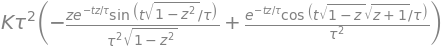

In [6]:
invL(G/s)

### The characteristic equation 'ce' is the denominator of the transfer function is the following one:

In [7]:
ce = sympy.Eq(sympy.denom(G), 0)
ce

In [8]:
# The roots of this equation are the following ones:

roots = sympy.roots(ce, s)
roots

In [9]:
# We can see that z value is a determining factor in the output response o the filter


In [10]:
%pip install -q ipywidgets
from ipywidgets import interact

In [15]:
def secondorder(K_in, tau_in, z_in, tmax):
    values = {K: sympy.nsimplify(K_in), tau: sympy.nsimplify(tau_in), z: sympy.nsimplify(z_in)}
    stepresponse = sympy.re(invL(G.subs(values)/s))

    sympy.plot(stepresponse, (t, 0, tmax), ylim = [-1, 1])

### Interactive curve (unit step response of the filter)

In [16]:
interact(secondorder, K_in=(0, 1.), tau_in=(0., 10.), z_in=(0., 2), tmax=(30., 100));

interactive(children=(FloatSlider(value=0.5, description='K_in', max=1.0), FloatSlider(value=5.0, description=…